# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [17]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


## Step1. 下載資料

In [2]:
breast_cancer=datasets.load_breast_cancer()
features = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
target = pd.DataFrame(breast_cancer["target"], columns=['target'])
print(f"keys: {breast_cancer.keys()}")
print(f'feature_names: {breast_cancer.feature_names}')
print(f"target_names: {breast_cancer.target_names}")
target_by_name = target['target'].map({0:breast_cancer.target_names[0], 1:breast_cancer.target_names[1]})
target_onehot = pd.get_dummies(target_by_name, prefix='type', dtype=int)
# target = pd.DataFrame(breast_cancer['target'], columns=breast_cancer['target_names'])
target

keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target_names: ['malignant' 'benign']


,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [71]:
print(f'features: {features}')
print(f'target: {target}')

features:      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave p

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_scatter(features:pd.DataFrame, target:pd.DataFrame, x_feature:str, y_feature:str, z_feature:str):
    """
    Plots a 3D scatter plot for the given three features of the dataset.


    Args:
        features (pd.DataFrame): DataFrame containing the features.
        target (pd.DataFrame): DataFrame containing the one-hot encoded target variable.
        x_feature (str): the name of the feature to use for the x-axis.
        y_feature (str): the name of the feature to use for the y-axis.
        z_feature (str): the name of the feature to use for the z-axis.
    """
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Color map: choose colors based on the 'type__malignant' column
    colors = target['target']

    # Scatter plot with colors based on the 'type__malignant' column
    scatter = ax.scatter(features[x_feature], features[y_feature], features[z_feature], 
                         c=colors, cmap='coolwarm', edgecolor='k')

    # Set labels
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_zlabel(z_feature)

    # Add a legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Malignant")
    ax.add_artist(legend1)

    # Set the title
    ax.set_title(f'3D Scatter Plot: {x_feature}, {y_feature}, {z_feature}')

    # Show the plot
    plt.show()

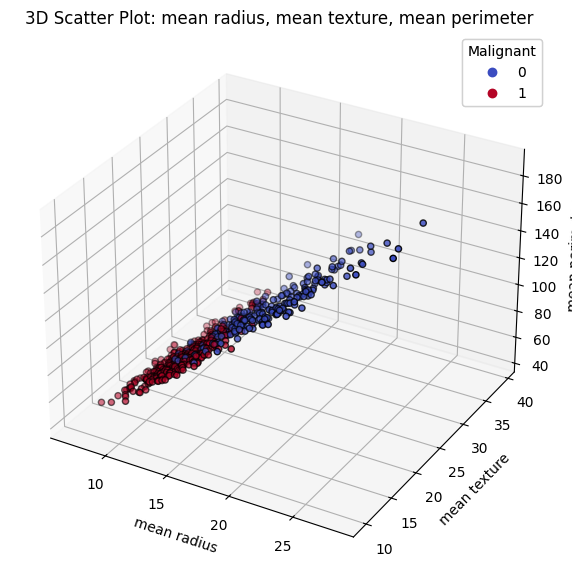

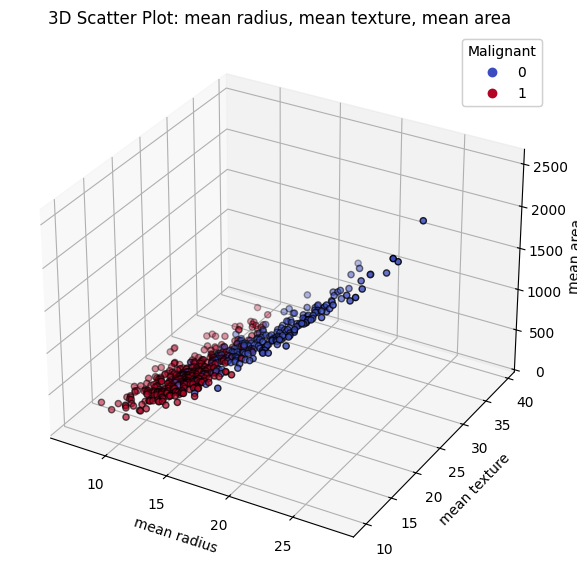

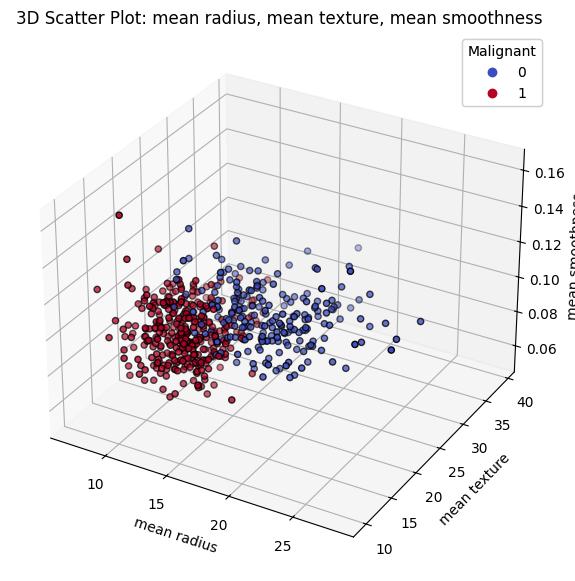

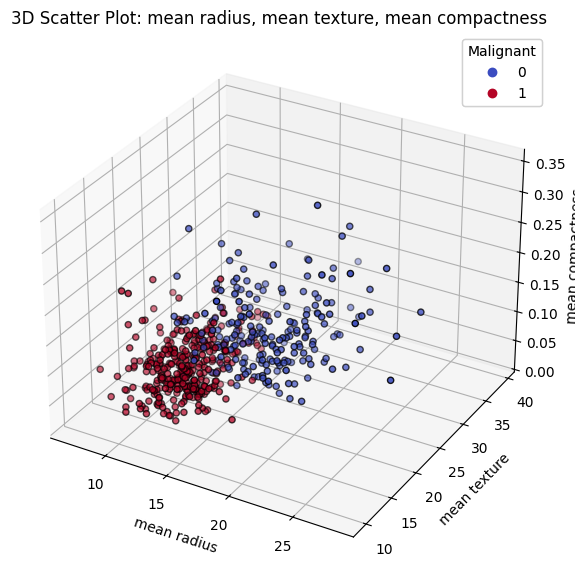

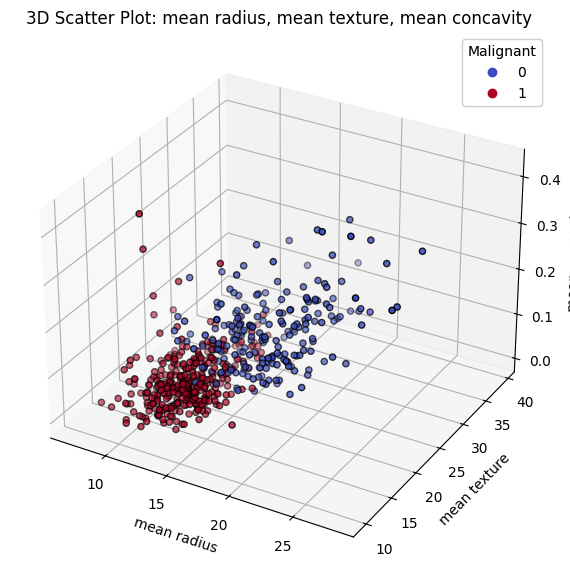

In [47]:
# Creating combinations of any three features to scatter plot
from itertools import combinations
combos = list(combinations(breast_cancer.feature_names, 3))

for combo in combos[:5]:
    x_feature, y_feature, z_feature = combo
    plot_3d_scatter(features=features, target=target, x_feature=x_feature, y_feature=y_feature, z_feature=z_feature)

## Step2. 區分訓練集與測試集

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=30)

In [50]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398, 1)
y_test shape: (171, 1)


In [51]:
# y_train is of size (398, 1)
# y_test is of size (171, 1)
# need to ravel it

y_train = y_train.squeeze()
y_test = y_test.squeeze()
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (398,)
y_test shape: (171,)


## Step3. 建模

In [52]:
clf = svm.SVC(kernel='rbf', gamma='auto', C=1000)
clf.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

## Step4. 預測

```

```


In [53]:
y_train

100    0
398    1
3      0
419    1
41     0
      ..
430    0
145    1
140    1
500    1
421    1
Name: target, Length: 398, dtype: int64

In [54]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Step5. 準確度分析

In [55]:
print(f'Training Data Score: {clf.score(X_train, y_train)}')
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6374269005847953


## 畫圖


In [67]:
def plot_3d_scatter_with_hyperplane(features:pd.DataFrame, target:pd.DataFrame, x_feature:str, y_feature:str, z_feature:str):
    """
    Plots a 3D scatter plot for the given three features of the dataset.


    Args:
        features (pd.DataFrame): DataFrame containing the features.
        target (pd.DataFrame): DataFrame containing the one-hot encoded target variable.
        x_feature (str): the name of the feature to use for the x-axis.
        y_feature (str): the name of the feature to use for the y-axis.
        z_feature (str): the name of the feature to use for the z-axis.
    """
    # Extract the relevant features
    X = features[[x_feature, y_feature, z_feature]].values
    y = target.squeeze()

    # Train an SVM model with linear kernel
    clf = svm.SVC(kernel='linear')
    clf.fit(X, y)
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Color map: choose colors based on the 'type__malignant' column
    colors = target['target']

    # Scatter plot with colors based on the 'type__malignant' column
    scatter = ax.scatter(features[x_feature], features[y_feature], features[z_feature], 
                         c=colors, cmap='coolwarm', edgecolor='k')

    # Set labels
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_zlabel(z_feature)

    # Add a legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Malignant")
    ax.add_artist(legend1)

    # Set the title
    ax.set_title(f'3D Scatter Plot with HyperPlane: {x_feature}, {y_feature}, {z_feature}')

    # Extract the coefficients and intercept from the trained model
    coef = clf.coef_[0]
    intercept = clf.intercept_[0]

    # Create a mesh grid based on the feature ranges
    x = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
    y = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
    X_mesh, Y_mesh = np.meshgrid(x, y)

    # Calculate the corresponding Z values for the hyperplane
    Z_mesh = (-coef[0] * X_mesh - coef[1] * Y_mesh - intercept) / coef[2]

    # Plot the hyperplane
    ax.plot_surface(X_mesh, Y_mesh, Z_mesh, color='yellow', alpha=0.3)

    # Show the plot
    plt.show()

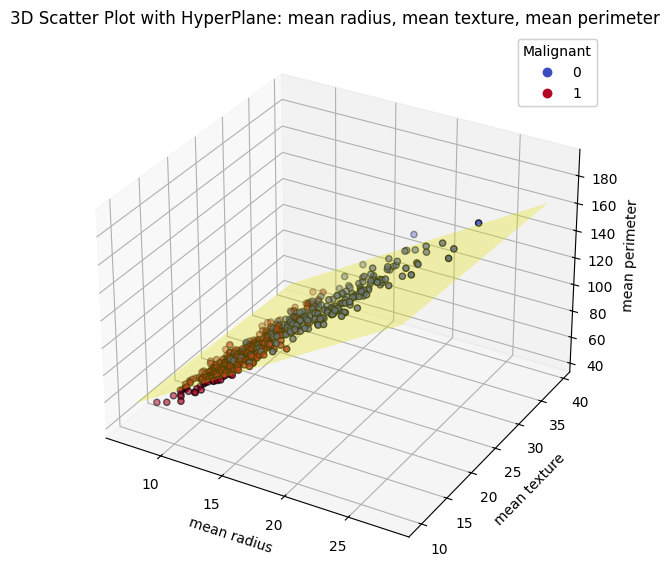

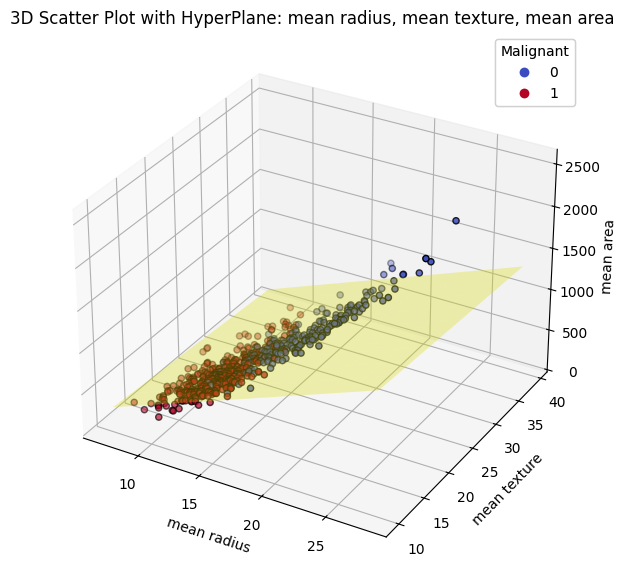

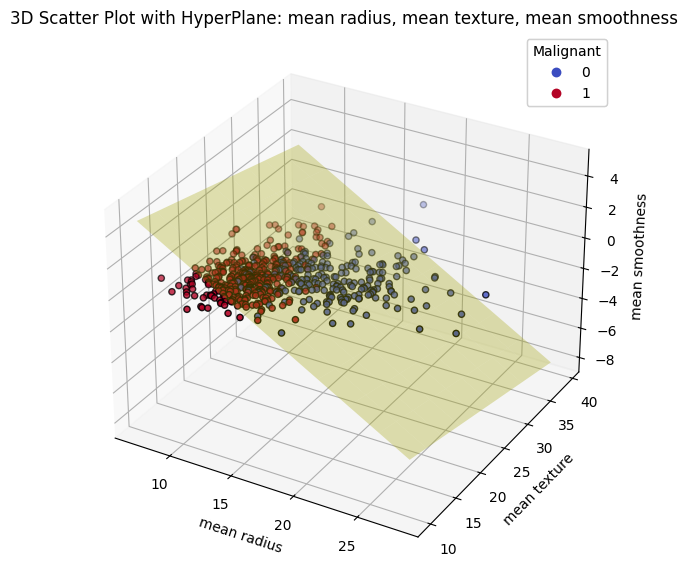

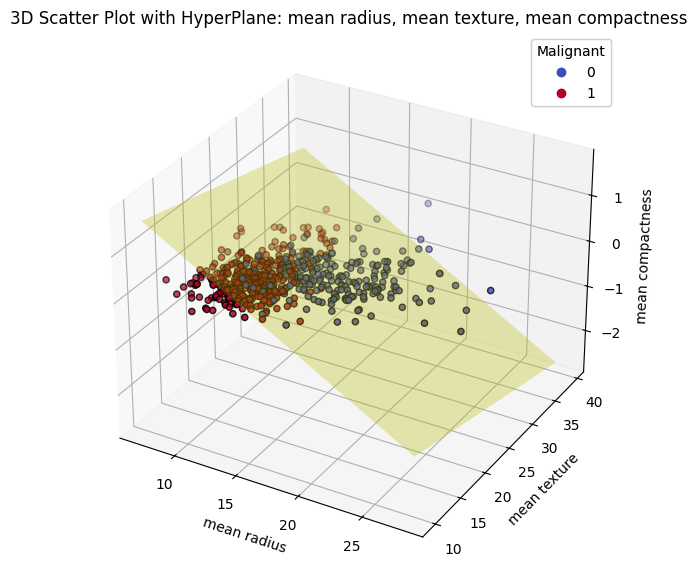

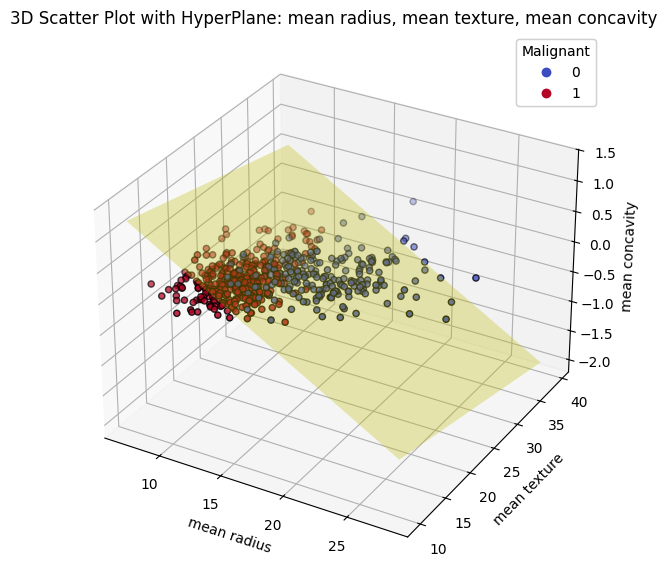

In [68]:
for combo in combos[:5]:
    x_feature, y_feature, z_feature = combo
    plot_3d_scatter_with_hyperplane( features=features, target=target, x_feature=x_feature, y_feature=y_feature, z_feature=z_feature)

## Implementation Grid Search

In [69]:
#define grids




grid_params = {
    "C": [10 ** i for i in range(-10, 6)],
    "gamma": [10 ** i for i in range(-10, 6)]
}

grid_params

{'C': [1e-10,
  1e-09,
  1e-08,
  1e-07,
  1e-06,
  1e-05,
  0.0001,
  0.001,
  0.01,
  0.1,
  1,
  10,
  100,
  1000,
  10000,
  100000],
 'gamma': [1e-10,
  1e-09,
  1e-08,
  1e-07,
  1e-06,
  1e-05,
  0.0001,
  0.001,
  0.01,
  0.1,
  1,
  10,
  100,
  1000,
  10000,
  100000]}

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# use grid search
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), grid_params, cv=5)
grid_search.fit(X_train, y_train)
# Output the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Predict on the test set
y_pred = grid_search.predict(X_test)
# Evaluate the model
# print(classification_report(y_test, y_pred))

Best parameters found: {'C': 10000, 'gamma': 1e-06}
Best cross-validation accuracy: 0.969873417721519
